In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
print(common_df.shape)
common_df.head()

(87439, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [4]:
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
common_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [5]:
target = '고덕동'
target_purpose = '2종일반'

In [6]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(309, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
3130,서울특별시 강동구 고덕동,4**,제2종일반주거지역,25m미만,2015-06-23,12.77,44900.0,3516.053250,11623.316092,토지,NaN
19132,서울특별시 강동구 고덕동,142-0,제2종일반주거지역,25m이상,2017-05-23,30.20,82800.0,2741.721854,9063.542980,연립/다세대,31.0
13832,서울특별시 강동구 고덕동,2**,제2종일반주거지역,25m이상,2017-03-11,39.20,99000.0,2525.510204,8348.793750,토지,NaN
12960,서울특별시 강동구 고덕동,2**,제2종일반주거지역,25m이상,2017-01-24,47.48,100000.0,2106.149958,6962.478939,토지,NaN
16726,서울특별시 강동구 고덕동,2**,제2종일반주거지역,25m이상,2017-07-27,7.91,16500.0,2085.967130,6895.758850,토지,NaN


In [22]:
target_df = target_df[target_df['단가(평)'] <= 5000]

<AxesSubplot:title={'center':'2015~최신 고덕동 2종일반주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 297건의 단가 산포도와 회귀선'}, ylabel='단가(평)'>

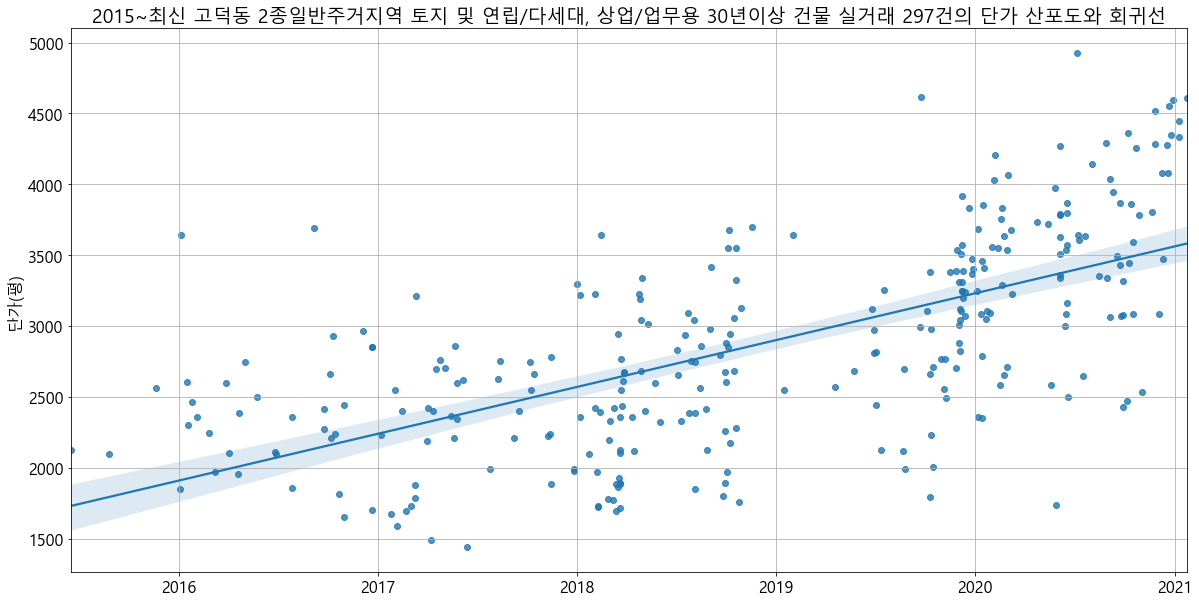

In [31]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose, target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])

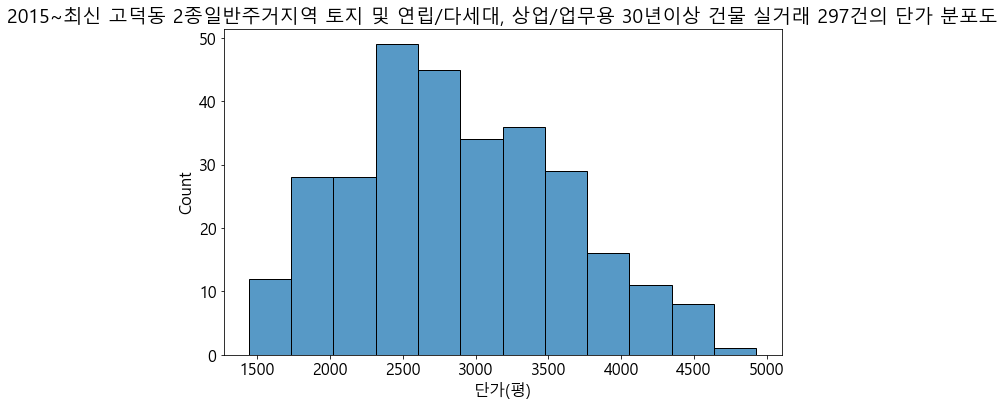

거래량: 297.0
평균: 2877.355964661106
표준편차: 724.2905573834985
최소: 1442.6861883047632
25분위: 2356.561876247505
중간값: 2783.039228553137
75분위: 3386.1929256594726
최대: 4926.828607943375


<Figure size 432x288 with 0 Axes>

In [24]:
f, ax = plt.subplots(figsize=(10,6))
plt.title('2015~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])

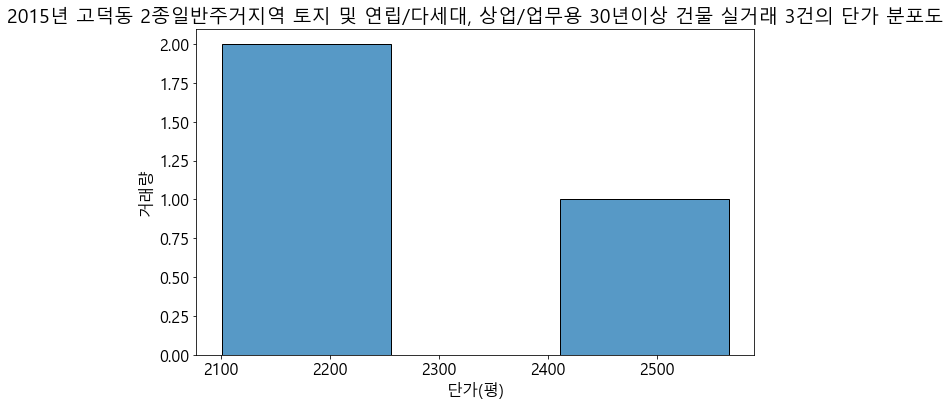

거래량: 3.0
평균: 2263.5879391293524
표준편차: 262.1561336639806
최소: 2100.5812462528656
25분위: 2112.3855393669546
중간값: 2124.189832481044
75분위: 2345.0912855675956
최대: 2565.992738654147


<Figure size 432x288 with 0 Axes>

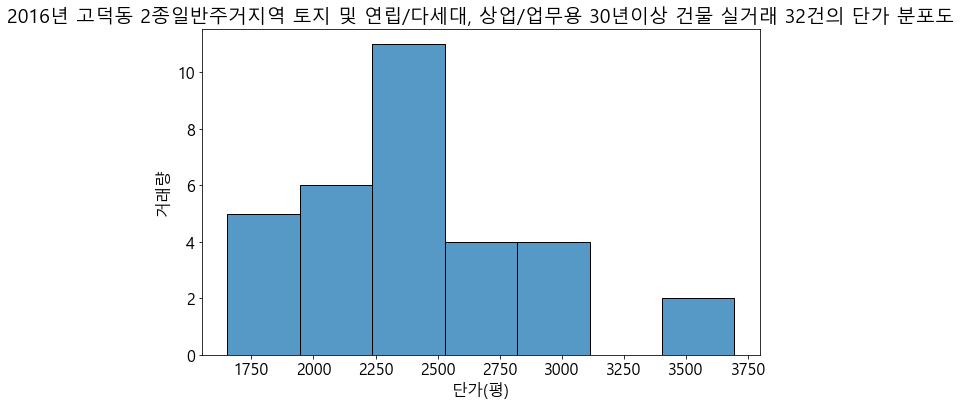

거래량: 32.0
평균: 2402.9721617900277
표준편차: 483.11220214402215
최소: 1652.8925000000002
25분위: 2106.930925327093
중간값: 2357.982167306941
75분위: 2618.6535285498203
최대: 3694.8926382788


<Figure size 432x288 with 0 Axes>

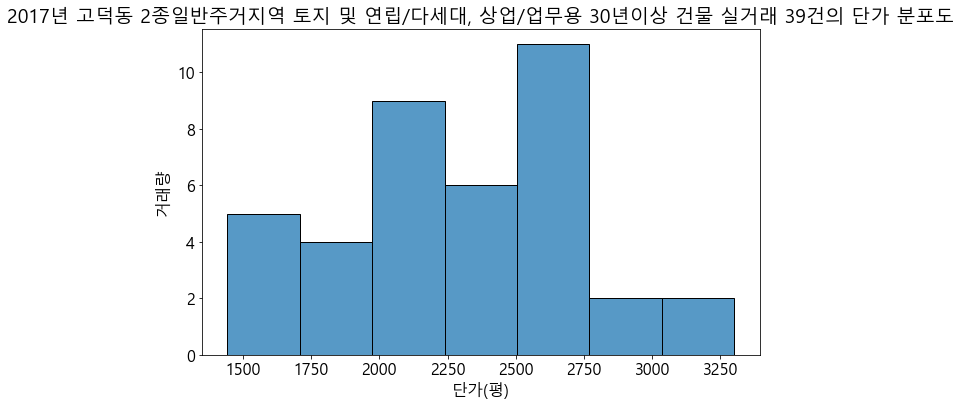

거래량: 39.0
평균: 2313.32392487605
표준편차: 454.30438652734654
최소: 1442.6861883047632
25분위: 1983.8275916899895
중간값: 2369.7711458621643
75분위: 2642.998440397042
최대: 3300.954335119337


<Figure size 432x288 with 0 Axes>

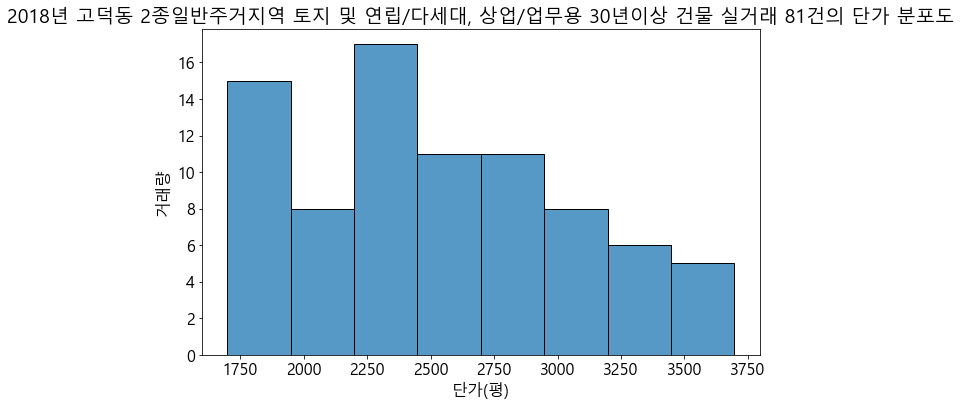

거래량: 81.0
평균: 2552.0730045316755
표준편차: 537.4892388430188
최소: 1697.9955056179776
25분위: 2124.930670339761
중간값: 2552.335546633725
75분위: 2941.767701664533
최대: 3697.259539473685


<Figure size 432x288 with 0 Axes>

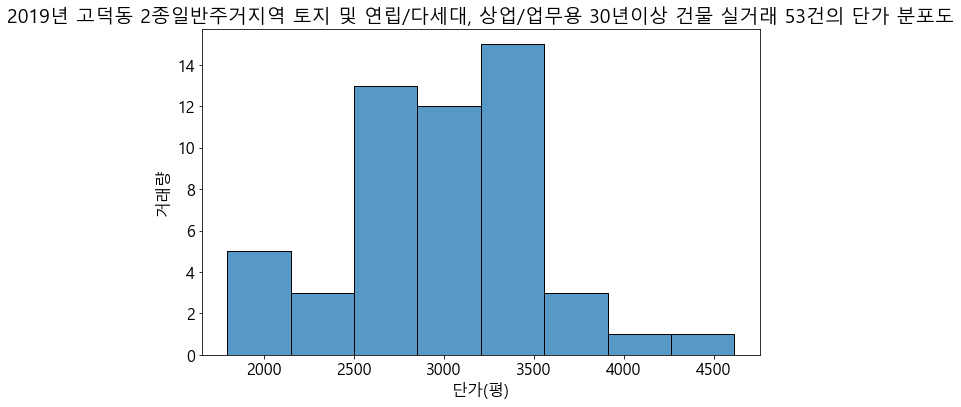

거래량: 53.0
평균: 2999.5438511395337
표준편차: 528.2426628335401
최소: 1796.622282608696
25분위: 2697.703335991494
중간값: 3043.0668916845657
75분위: 3367.8238605898127
최대: 4613.902377300614


<Figure size 432x288 with 0 Axes>

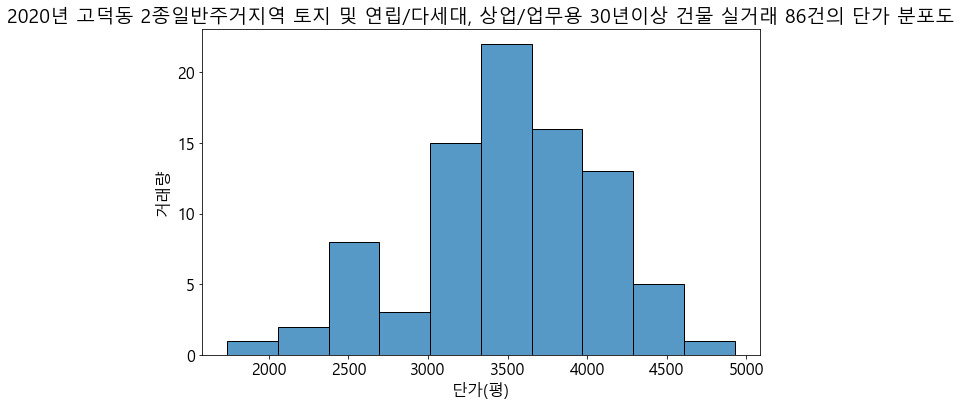

거래량: 86.0
평균: 3506.8328170879213
표준편차: 600.8679686672763
최소: 1738.7886597938143
25분위: 3088.547447604228
중간값: 3556.545913913673
75분위: 3866.1686698795625
최대: 4926.828607943375


<Figure size 432x288 with 0 Axes>

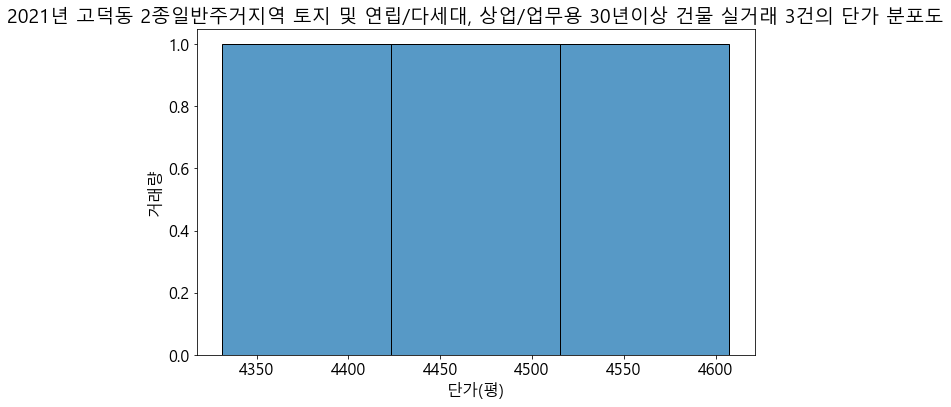

거래량: 3.0
평균: 4462.618564163825
표준편차: 138.59274914937404
최소: 4331.133864995728
25분위: 4390.244919416469
중간값: 4449.35597383721
75분위: 4528.360913747873
최대: 4607.365853658537


<Figure size 432x288 with 0 Axes>

In [25]:
for year in sorted(target_df['계약날짜'].dt.year.unique()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [26]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)

In [27]:
target_df.head(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강동구 고덕동,233-6,제2종일반주거지역,25m이상,2020-07-05,25.43,37900.0,1490.365710,4926.828608,연립/다세대,34.0
1,서울특별시 강동구 고덕동,2**,제2종일반주거지역,25m이상,2019-09-24,97.80,136500.0,1395.705521,4613.902377,토지,NaN
2,서울특별시 강동구 고덕동,509-1,제2종일반주거지역,12m미만,2021-01-23,28.70,40000.0,1393.728223,4607.365854,연립/다세대,35.0
3,서울특별시 강동구 고덕동,264-0,제2종일반주거지역,8m미만,2020-12-28,32.38,45000.0,1389.746757,4594.203984,연립/다세대,34.0
4,서울특별시 강동구 고덕동,250-1,제2종일반주거지역,8m미만,2020-12-21,29.19,40200.0,1377.183967,4552.674101,연립/다세대,34.0
5,서울특별시 강동구 고덕동,653-3,제2종일반주거지역,12m미만,2020-11-26,32.59,44500.0,1365.449524,4513.882556,연립/다세대,34.0
6,서울특별시 강동구 고덕동,642-3,제2종일반주거지역,8m미만,2021-01-09,34.40,46300.0,1345.930233,4449.355974,연립/다세대,33.0
7,서울특별시 강동구 고덕동,276-0,제2종일반주거지역,12m미만,2020-10-08,29.95,39500.0,1318.864775,4359.883389,연립/다세대,34.0
8,서울특별시 강동구 고덕동,542-6,제2종일반주거지역,25m이상,2020-12-25,37.65,49500.0,1314.741036,4346.251195,연립/다세대,34.0
9,서울특별시 강동구 고덕동,631-6,제2종일반주거지역,8m미만,2021-01-08,35.11,46000.0,1310.168043,4331.133865,연립/다세대,35.0


In [28]:
target_df.tail(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
277,서울특별시 강동구 고덕동,167-1,제2종일반주거지역,8m미만,2016-10-22,48.00,26400.0,550.000000,1818.181750,연립/다세대,30.0
278,서울특별시 강동구 고덕동,274-1,제2종일반주거지역,8m미만,2018-09-26,22.00,12000.0,545.454545,1803.155455,연립/다세대,32.0
279,서울특별시 강동구 고덕동,151-0,제2종일반주거지역,12m미만,2019-10-10,20.24,11000.0,543.478261,1796.622283,연립/다세대,32.0
280,서울특별시 강동구 고덕동,173-3,제2종일반주거지역,8m미만,2017-03-09,31.10,16800.0,540.192926,1785.761672,연립/다세대,31.0
281,서울특별시 강동구 고덕동,535-3,제2종일반주거지역,8m미만,2018-02-27,37.97,20500.0,539.899921,1784.793060,연립/다세대,32.0
282,서울특별시 강동구 고덕동,559-0,제2종일반주거지역,25m이상,2018-03-08,37.30,20000.0,536.193029,1772.538874,연립/다세대,31.0
283,서울특별시 강동구 고덕동,502-4,제2종일반주거지역,8m미만,2018-10-25,37.61,20000.0,531.773465,1757.928742,연립/다세대,30.0
284,서울특별시 강동구 고덕동,1**,제2종일반주거지역,12m미만,2020-05-28,47.53,25000.0,525.983589,1738.788660,토지,NaN
285,서울특별시 강동구 고덕동,530-2,제2종일반주거지역,8m미만,2017-03-03,36.28,19000.0,523.704520,1731.254548,연립/다세대,30.0
286,서울특별시 강동구 고덕동,530-2,제2종일반주거지역,8m미만,2018-02-08,36.28,19000.0,523.704520,1731.254548,연립/다세대,31.0


In [30]:
target_df.to_excel('./국토교통부_실거래가_공개시스템/땅값분석/고덕동 2종일반/고덕동_땅값분석.xlsx', index=False)